In [0]:
## mount google drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
## import libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from glob import glob

## CHOOSE A GENERATION OPTION

generationOption = "DCGAN" # choose: "WGAN" or "DCGAN" or "real"

## make adjusments to the chosen generation option

if generationOption == "WGAN":
  latentDim = 30
  generatorFolder = 'trained_models'
elif generationOption == "DCGAN":
  latentDim = 30
  generatorFolder = 'trained_models'
elif generationOption == "real":
  latentDim = 30
  trainset = torchvision.datasets.MNIST(root = "./data", train = True, download = True, transform = transforms.ToTensor())
## choose a seed and connect to cuda

torch.manual_seed(6)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

## define the net classes
class Generator(torch.nn.Module):
    def __init__(self, latentDim):
        super().__init__()

        self.fc1 = nn.Linear(latentDim, 1024, bias=True)
        self.fc1BatchNorm1d = nn.BatchNorm1d(num_features=1024)

        self.deConv1 = nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1)
        self.deConv1BatchNorm2d = nn.BatchNorm2d(num_features=32)

        self.deConv2 = nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=5, stride=2, padding=1)
        self.deConv2BatchNorm2d = nn.BatchNorm2d(num_features=16)

        self.deConv3 = nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=4, stride=2, padding=2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc1BatchNorm1d(x)
        x = torch.relu(x)

        x = x.view(-1, 16*4, 4, 4)
        x = self.deConv1(x)
        x = self.deConv1BatchNorm2d(x)
        x = torch.relu(x)

        x = self.deConv2(x)
        x = self.deConv2BatchNorm2d(x)
        x = torch.relu(x)

        x = self.deConv3(x)
        x = torch.tanh(x)

        return x

## define generator and connect to device

generator = Generator(latentDim=latentDim)
generator.to(device)



cuda:0


<All keys matched successfully>

In [0]:
## load trained generator

generator_load_name = 'generator with clip 20'
path = F"/content/gdrive/My Drive/project_321089724_302363965/{generatorFolder}/{generator_load_name}*.pt"
filename = glob(path)[0]
generator.load_state_dict(torch.load(filename))

<All keys matched successfully>

DCGAN images:


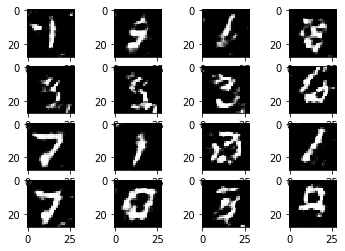

In [0]:
## HERE YOU CAN GENERATE NEW IMAGES

numberOfImagesToBeDisplayed = 16 # choose how many images you want to see

if generationOption != "real":
  with torch.no_grad():   
    z = torch.rand(numberOfImagesToBeDisplayed, latentDim).to(device)  
    fakeInput = generator(z)
    plt.figure()
    y=(fakeInput[:,0,:,:]*0.5+0.5).cpu().detach().numpy()
    for i in range(numberOfImagesToBeDisplayed):
      plt.subplot(numberOfImagesToBeDisplayed**0.5,numberOfImagesToBeDisplayed**0.5,i+1)
      plt.imshow(y[i], cm.gray, vmin=0, vmax=1)
    print(generationOption + " images:")
    plt.show()
else:
    for i in range(numberOfImagesToBeDisplayed):
      k = random.randint(0,len(trainset))
      y=trainset.data[k,:,:]
      plt.subplot(1,numberOfImagesToBeDisplayed,i+1)
      plt.imshow(y, cm.gray, vmin=0, vmax=255)
    print(generationOption + " images:")
    plt.show()